# #API활용 #긍부정지수 #04.15

In [1]:
# 패키지 불러오기
import openai
import pandas as pd

In [2]:
total = pd.read_csv('./test.csv', index_col=0)
total

,Platform,Number,Store,Address,Addr,Review_score,Review_counts,ID,Date,Review_text,Time
0,naver,1,포닐,서울 마포구 대흥로 183,서울 마포구,NaN,177,minsuksoft,3.30.토,일요일 기분 내기 위한 + 맛있기 위한 브런치로 완벽! 스테이크 샌드위치는 불고기가...,2024-04-07 - 20:09:27
1,naver,1,포닐,서울 마포구 대흥로 183,서울 마포구,NaN,177,kgcstyle,3.9.토,신상 이대 브런치 <포닐> 정말 맛있는 브런치를 즐길 수 있는 이대 브런치 & 이대...,2024-04-07 - 20:09:28
2,naver,1,포닐,서울 마포구 대흥로 183,서울 마포구,NaN,177,양팡80,4.5.금,새우 샌드위치랑 아이스아메리카노 주문했습니다 커 피도 맛있고 샌드위치도 맛있어요! ...,2024-04-07 - 20:09:28
3,naver,1,포닐,서울 마포구 대흥로 183,서울 마포구,NaN,177,uo****,4.6.토,항상 지나가면서 유심히 보던 빵집&브런치집인데 운 좋게 소금빵 나오는 시간에 방문했...,2024-04-07 - 20:09:28
4,naver,1,포닐,서울 마포구 대흥로 183,서울 마포구,NaN,177,OH옌,3.13.수,이대역 치아바타 샌드위치 맛집🥪 일정사이에 시간 이 붕떠서 시간도 떼우고 점심을 먹...,2024-04-07 - 20:09:28
17,Kakao,1,만동제과,서울 서대문구 연희로 32 1층 (창천동),서울 서대문구,4.3,303,앙앙,2024.01.01.,나의 2024년 1월 1일 첫 먹방은 그간 너무너무너무 먹고 싶었던 ‘만동제과 마늘...,2024-04-05 - 10:35:09
18,Kakao,1,만동제과,서울 서대문구 연희로 32 1층 (창천동),서울 서대문구,4.3,303,니엘,2024.01.01.,너무 맛있게 먹어서 사진도 못남겼어요 마늘바게뜨가 촉촉 부들하고 진한 마늘의 단맛이...,2024-04-05 - 10:34:50
19,Kakao,1,만동제과,서울 서대문구 연희로 32 1층 (창천동),서울 서대문구,4.3,303,ㅇㅅㅇ,2024.01.03.,친절 하십니다 근데 막 꼭 먹어야한다 정도는 아닌.것 같아요,2024-04-05 - 10:34:32
20,Kakao,1,만동제과,서울 서대문구 연희로 32 1층 (창천동),서울 서대문구,4.3,303,램든고지,2024.01.04.,마늘바게트에 묻힌 빵들 너무 많음 홍국이 깨찰빵 도라이임,2024-04-05 - 10:34:13
21,Kakao,1,만동제과,서울 서대문구 연희로 32 1층 (창천동),서울 서대문구,4.3,303,토끼토끼🐰,2024.01.04.,마늘빵 달달하고 촉촉하니 맛있어요. 카푸치노는 커피맛나는 생크림빵인데 구름처럼 슈...,2024-04-05 - 10:33:55


In [3]:
# API 키 지정하여 클라이언트 선언하기
OPENAI_API_KEY="API_KEY"

client = openai.OpenAI(api_key = "")

# client = openai.OpenAI(api_key = "여기에 API 키를 넣어주세요")

In [ ]:
system_prompt = """You must:1. Analyze keywords in detail from the provided bakery reviews and assign scores for all 27 characteristics. For characteristics 1 through 25, output scores between -100 and +100. The 'Pets' keyword must be related to the 'customer's' 'pet'. Wild animals do not qualify. 2. Read the input review text and determine the 26th characteristic, the emotional index, as either 0 or 1. 1 indicates a positive evaluation, and 0 indicates a negative evaluation. If the emotional index cannot be determined, give it a 1. 3. For the 27th characteristic, 'special menu item name', output the name of the special bread mentioned in the review in the order of the characteristics. If none, output 'None'. 4. The result should be output as a list of numbers only. Output example: [40, 50, 0, 0, 0, 10, -5, 0, 10, 0, 10, 30, -70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'bread name'] Characteristics: 'delicious bread', 'delicious drinks', 'vegan', 'no senior zone', 'no kids zone', 'pets allowed', 'uses whole wheat', 'good view', 'good atmosphere', 'friendly', 'clean store', 'clean restrooms', 'parking available', 'spacious store', 'plenty of seating', 'comfortable seating', 'special menu available', 'photo', 'good music', 'reservation available', 'unique concept', 'beautiful interior', 'price', 'waiting', 'healthy', 'overall review emotional score', 'special menu item name' **Please make sure to output the results in the format shown in the example.** ** No explanation is needed.**
"""

In [ ]:
bread = []
beverage = []
vegan = []
no_senior = []
no_kids = []
pet = []
wholewheat = []
nice_view = []
atmosphere = []
friendly = []
clean_store = []
restroom_clean = []
parking = []
spacious_store = []
plenty_seats = []
comfortable_seats = []
special_menu = []
photo = []
good_music = []
reservation_possible = []
unique_concept = []
beautiful_interior = []
price = []
wait = []
health = []
sentiment = []
bread_name = []

def response_gpt(prompt):
  response = client.chat.completions.create(
  model="gpt-4-turbo-2024-04-09",
  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": prompt}],
  temperature = 0
    )
  return response.choices[0].message.content

result = bread, beverage, vegan, no_senior, no_kids, pet, wholewheat, nice_view, atmosphere, friendly, clean_store, restroom_clean, parking, spacious_store, plenty_seats, comfortable_seats, special_menu, photo, good_music, reservation_possible, unique_concept, beautiful_interior, price, wait, health, sentiment, bread_name

for i in total['Review_text']:
  answer = response_gpt(i)
  answer2 = answer.replace('[', '').replace(']', '')
  answer_list = answer2.split(',')
  

  for i in range(len(answer_list)):
    if i < 26:
      result[i].append(answer_list[i].replace(' ',''))
    elif i == 26:
      text = [j.replace("'",'').replace(' ','') for j in answer_list[26:]]
      result[-1].append(text)

df = pd.DataFrame()
df['bread'] = bread
df['beverage'] = beverage
df['vegan'] = vegan
df['no_senior'] = no_senior
df['no_kids'] = no_kids
df['pet'] = pet
df['whole_wheat'] = wholewheat
df['view'] = nice_view
df['atmosphere'] = atmosphere
df['friendly'] = friendly
df['clean_store'] = clean_store
df['restroom_clean'] = restroom_clean
df['parking'] = parking
df['spacious_store'] = spacious_store
df['plenty_seats'] = plenty_seats
df['comfortable_seats'] = comfortable_seats
df['special_menu'] = special_menu
df['photo'] = photo
df['good_music'] = good_music
df['reservation_possible'] = reservation_possible
df['unique_concept'] = unique_concept
df['beautiful_interior'] = beautiful_interior
df['price'] = price
df['wait'] = wait
df['health'] = health
df['sentiment'] = sentiment
df['bread_name'] = bread_name
df

# 04.17 표준화.ver1

In [164]:
import pandas as pd
df = pd.read_csv('./real_fin_dataset(ver.2)(24.04.17).csv')
df = df.drop('Unnamed: 0', axis=1)
score = df[['Store','Review_score','Review_counts','slope','bread', 'beverage', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior', 'price', 'wait', 'health', 'sentiment']]
score

,Store,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,5센소커피충무로점,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5센소커피충무로점,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5센소커피충무로점,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5센소커피충무로점,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5센소커피충무로점,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,황소쿠키,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15223,황소쿠키,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15224,황소쿠키,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,1
15225,황소쿠키,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,1


In [165]:
score['Store'].value_counts().sort_values(ascending=False)

Store
태극당                1106
혜민당                 357
수잔나의앞치마             351
서울신라호텔패스트리부티크       318
러시아케이크              299
                   ... 
순화동빵집                 1
이지바이충정로점              1
델리카트슨                 1
퐁네프과자점                1
파티쉐리신세계백화점본점신관점       1
Name: count, Length: 208, dtype: int64

In [166]:
score.isnull().sum()

Store                   0
Review_score            0
Review_counts           0
slope                   0
bread                   1
beverage                1
vegan                   1
no_senior               0
no_kids                 0
pet                     0
whole_wheat             0
view                    0
atmosphere              0
friendly                0
clean_store             0
restroom_clean          0
parking                 0
spacious_store          0
plenty_seats            0
comfortable_seats       0
special_menu            0
photo                   0
good_music              0
reservation_possible    0
unique_concept          0
beautiful_interior      0
price                   0
wait                    0
health                  0
sentiment               0
dtype: int64

In [167]:
null_values = score.isnull().sum()
result = null_values[null_values > 0]
result

bread       1
beverage    1
vegan       1
dtype: int64

In [125]:
# 04.18 널값이 처리된 최종 파일이다. (아마도)
import pandas as pd
df = pd.read_csv('./real_fin_dataset(ver.3)(24.04.18)(최종).csv')
df = df.drop('Unnamed: 0', axis=1)
score = df[['Review_score','Review_counts','slope','bread', 'beverage', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior', 'price', 'wait', 'health', 'sentiment']]
score

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15223,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15224,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,1
15225,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,1


In [127]:
score.describe()

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
count,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.00000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000
mean,4.313563,1227.422736,1.478147,33.668155,12.556643,0.070927,0.000000,0.042687,0.101136,0.130689,2.142904,6.593551,5.012806,1.163066,0.216720,0.00000,2.326131,0.661982,0.495173,0.130164,0.604847,0.243646,0.228541,0.313916,3.404479,-0.725750,-0.723058,0.973008,0.903986
std,0.323753,2254.198131,1.743989,44.333654,28.975422,2.764016,1.985101,3.373429,3.215663,3.519848,13.617316,23.581534,26.860891,14.315463,7.412012,8.10009,15.478719,9.483153,9.262920,3.375023,8.418677,5.303083,5.149828,4.907522,15.949957,18.899804,7.324007,9.747434,0.294620
min,2.000000,1.000000,0.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-50.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-100.000000,0.000000,-50.000000,-100.000000,-100.000000,-100.000000,0.000000
25%,4.300000,233.000000,0.337680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.390000,413.000000,1.012950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.430000,1411.000000,1.909020,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,20194.000000,12.299820,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000


In [128]:
missing_values = score.isnull().sum()
filtered_columns = missing_values[missing_values > 0]
filtered_columns # 잘 처리된 게 보인다.

Series([], dtype: int64)

In [130]:
name = 'Review_counts'

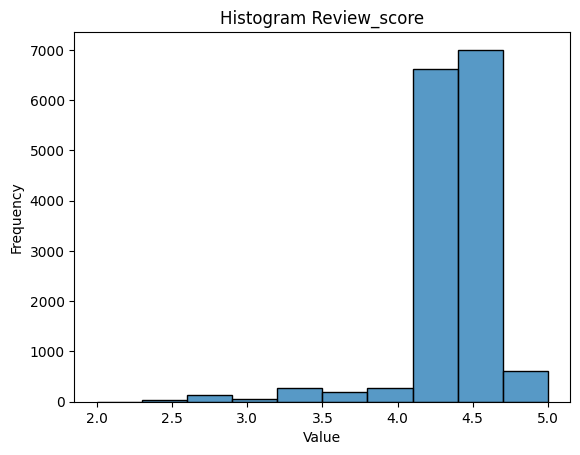

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(score[name], bins=10, kde=False)

plt.title(f'Histogram {name}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

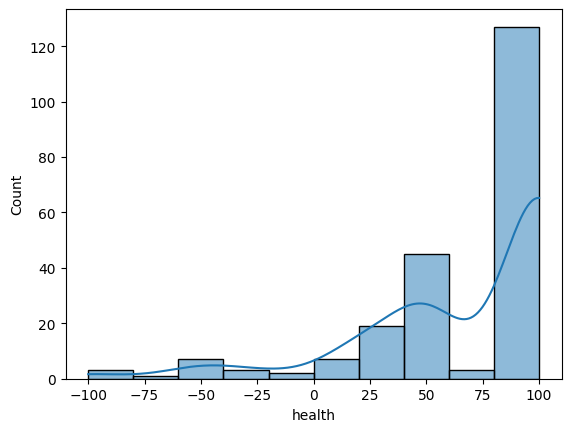

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# '0'이 아닌 값들만 필터링
filtered_df = score[score[name] != 0]

# 특성별 히스토그램 확인
sns.histplot(filtered_df[name], bins=10, kde=True)
plt.show()

# 04.18 표준화.ver2

In [22]:
ch_score = score[['Review_score','Review_counts','slope','bread', 'beverage', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior', 'price', 'wait', 'health']]
ch_score

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health
0,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,100,100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15223,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15224,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,50,0,0
15225,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100


In [ ]:
# 팀원 코드 (굿!)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_bread_anal_ss['Review_score_ss'] = ss.fit_transform(df_bread_anal[['Review_score']])
df_bread_anal_ss['Review_counts_ss'] = ss.fit_transform(df_bread_anal[['Review_counts']])
df_bread_anal_ss['slope_ss'] = ss.fit_transform(df_bread_anal[['slope']])

In [29]:
# 기본 코드
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# DataFrame에 MinMaxScaler 적용
x_scaled = scaler.fit_transform(ch_score)
# 스케일링된 데이터를 다시 DataFrame으로 변환
scaled = pd.DataFrame(x_scaled, columns=ch_score.columns)

# 스케일링된 DataFrame 출력
scaled

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health
0,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825
1,-0.041896,-0.396350,-0.847594,-0.533882,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825
2,-0.041896,-0.396350,-0.847594,-0.759452,-2.159026,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825
3,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825
4,-0.041896,-0.396350,-0.847594,-0.533882,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,6.056361,5.329635,0.098728,-0.099825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825
15223,0.266992,-0.527222,0.507074,1.496245,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825
15224,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,2.684018,0.098728,-0.099825
15225,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.053459,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,10.159622


In [24]:
x_scaled

array([[-0.04189567, -0.39635029, -0.84759446, ...,  0.03840115,
         0.09872757, -0.09982529],
       [-0.04189567, -0.39635029, -0.84759446, ...,  0.03840115,
         0.09872757, -0.09982529],
       [-0.04189567, -0.39635029, -0.84759446, ...,  0.03840115,
         0.09872757, -0.09982529],
       ...,
       [ 0.26699183, -0.52722152,  0.50707427, ...,  2.68401808,
         0.09872757, -0.09982529],
       [ 0.26699183, -0.52722152,  0.50707427, ...,  0.03840115,
         0.09872757, 10.15962169],
       [ 0.26699183, -0.52722152,  0.50707427, ...,  0.03840115,
         0.09872757, -0.09982529]])

In [27]:
score_ss = score.copy()
score_ss

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15223,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15224,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,50,0,0,1
15225,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,1


In [33]:
score_ss['Review_score'] = scaler.fit_transform(score[['Review_score']])
score_ss['Review_counts'] = scaler.fit_transform(score[['Review_counts']])
score_ss['slope'] = scaler.fit_transform(score[['slope']])
score_ss

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,-0.041896,-0.396350,-0.847594,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.041896,-0.396350,-0.847594,10.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.041896,-0.396350,-0.847594,0.0,-50.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.041896,-0.396350,-0.847594,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.041896,-0.396350,-0.847594,10.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,-0.527222,0.507074,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15223,0.266992,-0.527222,0.507074,100.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15224,0.266992,-0.527222,0.507074,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,50,0,0,1
15225,0.266992,-0.527222,0.507074,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,1


In [45]:
ver4 = pd.read_csv('./real_fin_dataset(ver.4)(24.04.18).csv')
ver4

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,-0.041896,-0.396350,-0.847594,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.041896,-0.396350,-0.847594,10.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.041896,-0.396350,-0.847594,0.0,-50.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.041896,-0.396350,-0.847594,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.041896,-0.396350,-0.847594,10.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,-0.527222,0.507074,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15223,0.266992,-0.527222,0.507074,100.0,100.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15224,0.266992,-0.527222,0.507074,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,50,0,0,1
15225,0.266992,-0.527222,0.507074,50.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,1


In [18]:
scaled['sentiment'] = score['sentiment'] # 감정지수 빼고 돌린거에 원래 감정지수 붙이기
scaled

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
1,-0.041896,-0.396350,-0.847594,-0.533882,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
2,-0.041896,-0.396350,-0.847594,-0.759452,-2.159026,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,0
3,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
4,-0.041896,-0.396350,-0.847594,-0.533882,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,6.056361,5.329635,0.098728,-0.099825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
15223,0.266992,-0.527222,0.507074,1.496245,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
15224,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,2.684018,0.098728,-0.099825,1
15225,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,10.159622,1


In [19]:
scaled.to_csv('real_fin_dataset(ver.5)(24.04.18).csv', index=False)

In [80]:
ver5 = pd.read_csv('./real_fin_dataset(ver.5)(24.04.18).csv')
ver5

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
1,-0.041896,-0.396350,-0.847594,-0.533882,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
2,-0.041896,-0.396350,-0.847594,-0.759452,-2.159026,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,0
3,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
4,-0.041896,-0.396350,-0.847594,-0.533882,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,6.056361,5.329635,0.098728,-0.099825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
15223,0.266992,-0.527222,0.507074,1.496245,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
15224,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,2.684018,0.098728,-0.099825,1
15225,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,10.159622,1


# 04.17 예전 표준화(전체 민맥스)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# DataFrame에 MinMaxScaler 적용
x_scaled = scaler.fit_transform(score)

# 스케일링된 데이터를 다시 DataFrame으로 변환
scaled = pd.DataFrame(x_scaled, columns=score.columns)

# 스케일링된 DataFrame 출력
scaled

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,0.766667,0.016491,0.000000,0.50,0.50,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,0.5,1.0
1,0.766667,0.016491,0.000000,0.55,1.00,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,0.5,1.0
2,0.766667,0.016491,0.000000,0.50,0.25,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,0.5,0.0
3,0.766667,0.016491,0.000000,0.50,0.50,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,0.5,1.0
4,0.766667,0.016491,0.000000,0.55,0.50,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,1.000000,1.00,0.5,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.800000,0.001882,0.192072,0.75,0.50,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,0.5,1.0
15223,0.800000,0.001882,0.192072,1.00,1.00,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,0.5,1.0
15224,0.800000,0.001882,0.192072,0.75,0.50,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.75,0.5,0.5,1.0
15225,0.800000,0.001882,0.192072,0.75,0.50,0.5,0.5,0.5,0.5,0.333333,...,0.0,0.5,0.5,0.5,0.0,0.333333,0.50,0.5,1.0,1.0


In [27]:
scaled.describe()

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
count,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,...,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000
mean,0.771188,0.060735,0.120176,0.668341,0.562783,0.500355,0.500000,0.500213,0.500506,0.334205,...,0.001302,0.503024,0.501218,0.501143,0.003139,0.356030,0.496371,0.496385,0.504865,0.903986
std,0.107918,0.111633,0.141790,0.221668,0.144877,0.013820,0.009926,0.016867,0.016078,0.023466,...,0.033750,0.042093,0.026515,0.025749,0.049075,0.106333,0.094499,0.036620,0.048737,0.294620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.766667,0.011489,0.027454,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.333333,...,0.000000,0.500000,0.500000,0.500000,0.000000,0.333333,0.500000,0.500000,0.500000,1.000000
50%,0.796667,0.020403,0.082355,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.333333,...,0.000000,0.500000,0.500000,0.500000,0.000000,0.333333,0.500000,0.500000,0.500000,1.000000
75%,0.810000,0.069826,0.155207,0.900000,0.500000,0.500000,0.500000,0.500000,0.500000,0.333333,...,0.000000,0.500000,0.500000,0.500000,0.000000,0.333333,0.500000,0.500000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 분포 확인(반복)

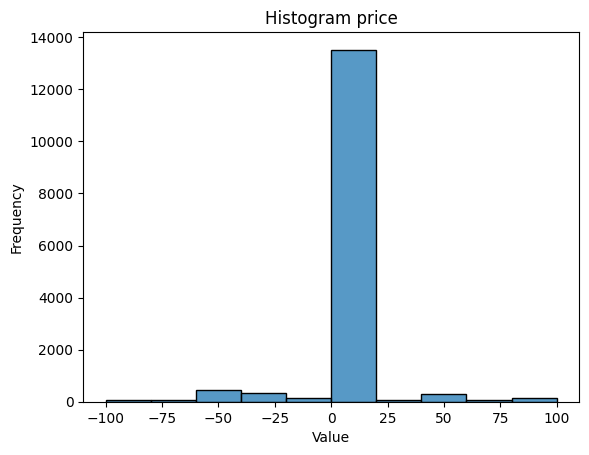

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

name = 'price'

sns.histplot(score[name], bins=10, kde=False)

plt.title(f'Histogram {name}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(False)

plt.show()